In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style("whitegrid")

In [21]:
df = pd.read_csv (r'HIV.csv')
print (df)

      time      conc
0   0.0000  106000.0
1   0.0831   93240.0
2   0.1465  167000.0
3   0.2587  154000.0
4   0.4828  119000.0
5   0.7448  117000.0
6   0.9817  110000.0
7   1.2563  111000.0
8   1.4926   74388.0
9   1.7299   83291.0
10  1.9915   66435.0
11  3.0011   35408.0
12  4.0109   21125.0
13  5.0090   20450.0
14  5.9943   15798.0
15  7.0028    4785.2


### Question 1
#### 1.4.b

Text(0.5, 1.0, 'Semilog plot of time since administration of a treatment to an HIV patient')

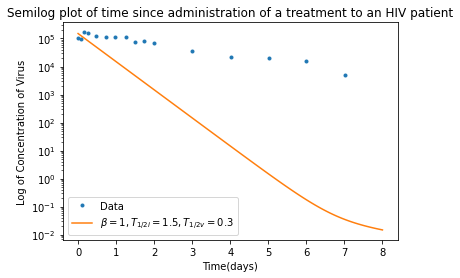

In [32]:
t= np.linspace(0,8,100)
thalf_i=1.5
k_i= np.log(2)/thalf_i
thalf_v = 0.3
k_v= np.log(2)/thalf_v
beta = 1

V0=1.5e5
Vt= ((beta/(k_v-k_i))*np.exp(-k_i*t)) + ((V0-(beta/(k_v-k_i)))*np.exp(-k_v*t))

plt.semilogy(df['time'], df['conc'], '.')
plt.semilogy(t, Vt)
plt.xlabel('Time(days)')
plt.ylabel('Log of Concentration of Virus')
plt.legend(['Data', r'$\beta = 1, T_{1/2i} = 1.5, T_{1/2v} = 0.3$'])
plt.title('Semilog plot of time since administration of a treatment to an HIV patient')

Changing values to get a closer fit for the data

Text(0.5, 1.0, 'Semilog plot of time since administration of a treatment to an HIV patient')

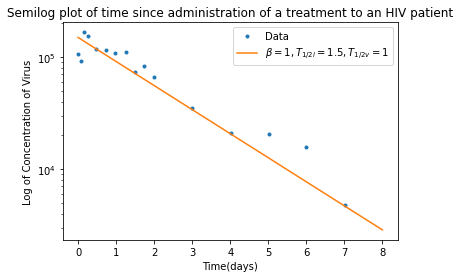

In [36]:
thalf_i=1.5
k_i= np.log(2)/thalf_i
thalf_v = 1.4
k_v= np.log(2)/thalf_v
beta = 1

V0=1.5e5
Vt= ((beta/(k_v-k_i))*np.exp(-k_i*t)) + ((V0-(beta/(k_v-k_i)))*np.exp(-k_v*t))

plt.semilogy(df['time'], df['conc'], '.')
plt.semilogy(t, Vt)
plt.xlabel('Time(days)')
plt.ylabel('Log of Concentration of Virus')
plt.legend(['Data', r'$\beta = 1, T_{1/2i} = 1.5, T_{1/2v} = 1$'])
plt.title('Semilog plot of time since administration of a treatment to an HIV patient')

#### 1.4.c

$N_{v, asym} = X\exp{-k_it}$

We first find the slope and intercept using the last and 12$^{th}$ data point. We equate the slope to $-k_i$ and the intercept to $\exp{c}$.

11.948888322959867


Text(0.5, 1.0, 'Semilog plot of time since administration of a treatment to an HIV patient')

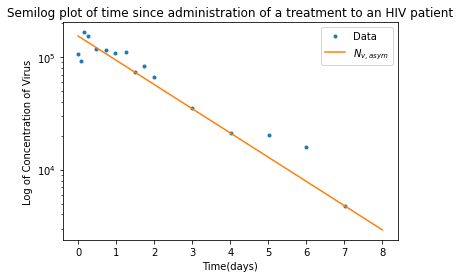

In [57]:
m = (np.log(df['conc'][15]) - np.log(df['conc'][12]))/(df['time'][15] - df['time'][12])
c = np.log(df['conc'][15]) - m*df['time'][15]

X = np.exp(c)
k_i = -m

print(c)

Vt= X*np.exp(-k_i*t)


plt.semilogy(df['time'], df['conc'], '.')
plt.semilogy(t, Vt)
plt.xlabel('Time(days)')
plt.ylabel('Log of Concentration of Virus')
plt.legend(['Data', r'$N_{v, asym}$'])
plt.title('Semilog plot of time since administration of a treatment to an HIV patient')

We found that $k_v = \frac{-k_iX}{N_{v0}-X}$, we use this and the values from the previous case to plot the result.

1/k_i =  2.0148433298285338


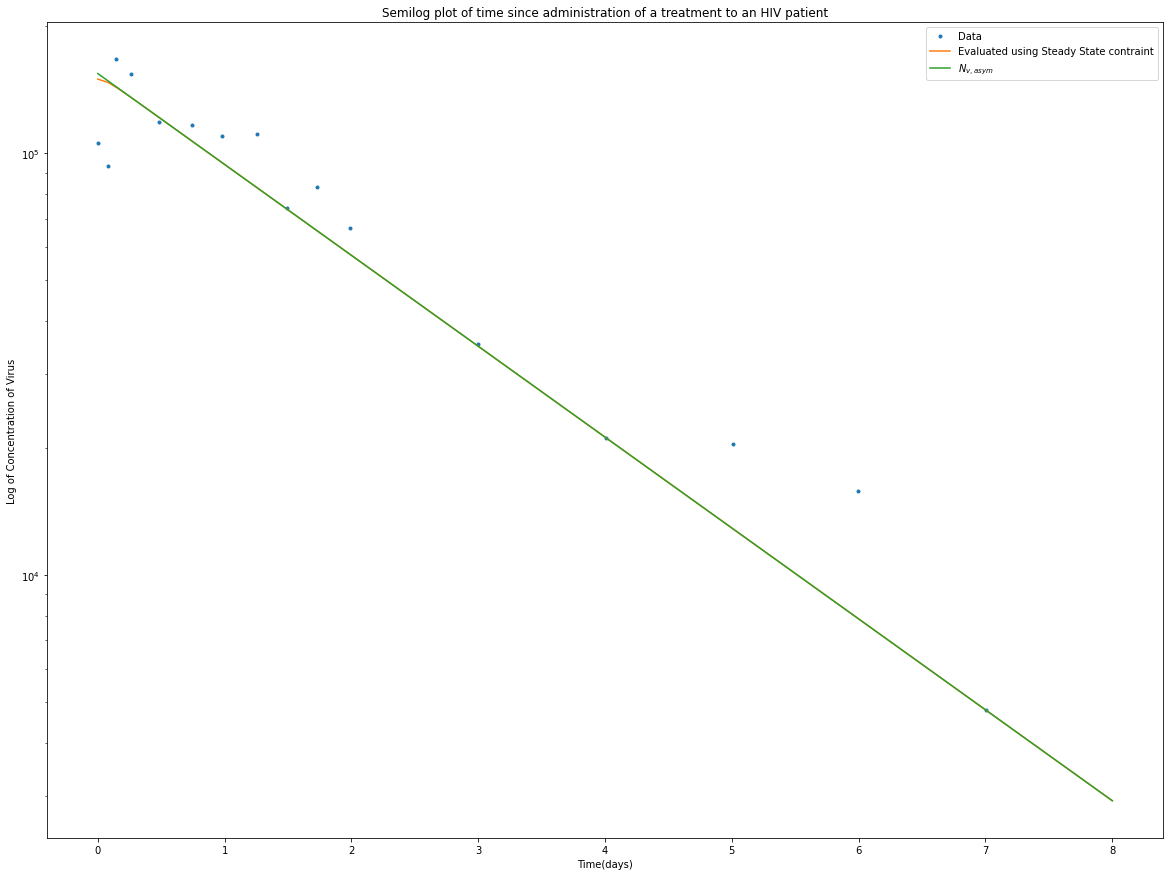

In [63]:
k_v = (-X*k_i)/(V0 - X)

Vt= X*np.exp(-k_i*t) + (V0-X)*np.exp(-k_v*t)

Vt_asymp= X*np.exp(-k_i*t)

plt.figure(figsize = (20, 15))
plt.semilogy(df['time'], df['conc'], '.')
plt.semilogy(t, Vt)
plt.semilogy(t, Vt_asymp)
plt.xlabel('Time(days)')
plt.ylabel('Log of Concentration of Virus')
plt.legend(['Data', r'Evaluated using Steady State contraint',r'$N_{v, asym}$' ])
plt.title('Semilog plot of time since administration of a treatment to an HIV patient')

print('1/k_i = ', 1/k_i)